# Principal Component Analysis

* PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, noise filtering, feature extraction and engineering, and much more.

# A. PCA

* In PCA, the relationship between features and labels is quantified by finding a list of the principal axes in the data, and using the axes to describe the dataset.

* `pca.components_`:
    * Define the direction of the vector.

* `pca.explained_variance_`:
    * define the squared length of the vector.
    * Indication of how "important" that axis is in describing the distribution of the data.
    * It is a measure of the variance of the data when projected onto the axis.

* These vectors represent the principal axes of the data.
    * The projection of each data point onto the principal axes are the principal components of the data.

* Affine Transformation:
    * Transformation from data axes to principal axes. Composed of a translation, rotation and uniform scaling.

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

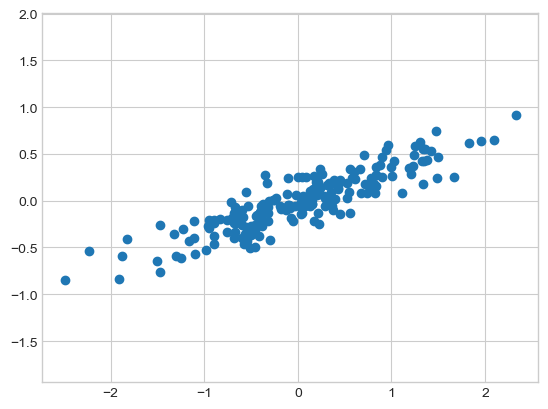

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


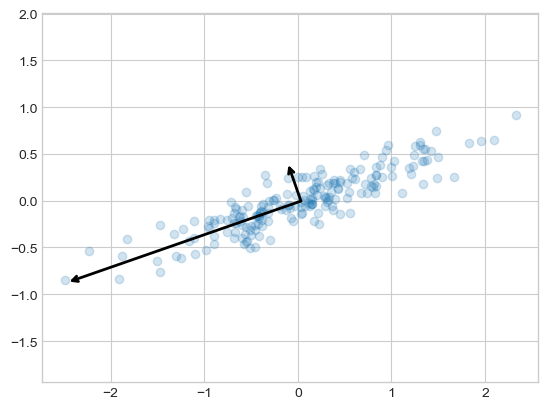

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

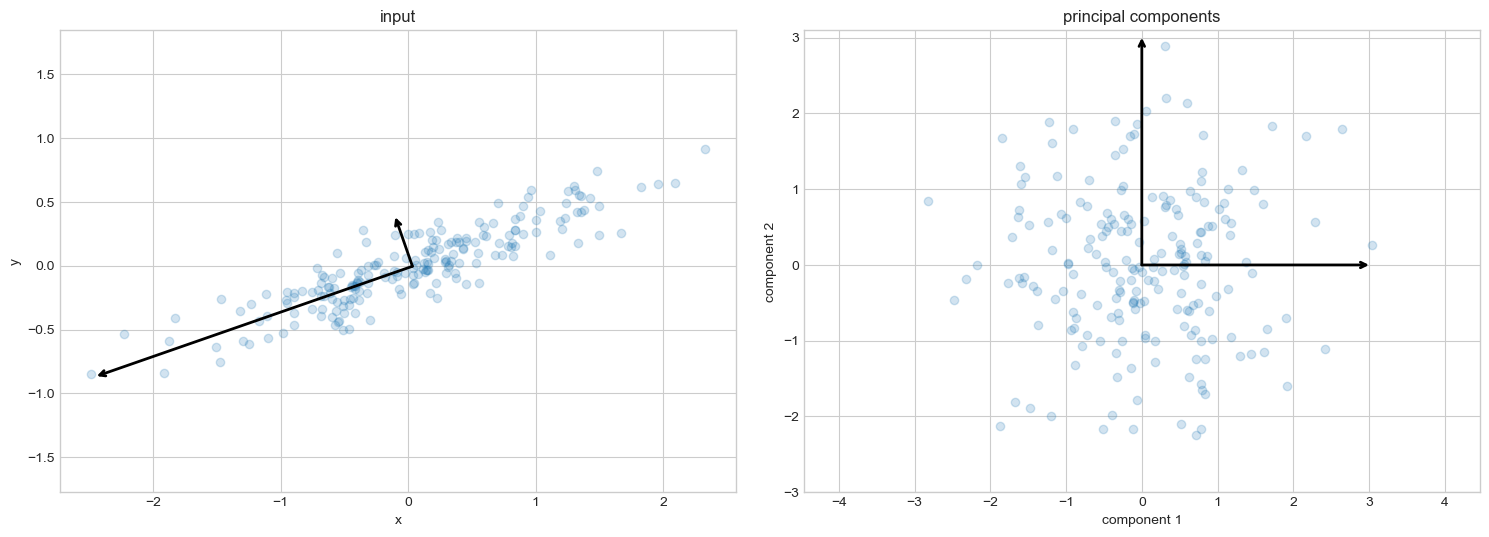

In [10]:
# Affine Transformation
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));


### A.1. PCA as Dimensionality Reduction

* Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


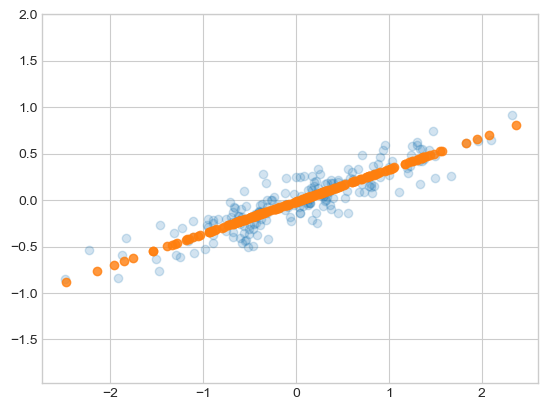

In [12]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### A.2. PCA for Visualization: Handwritten Digits



In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


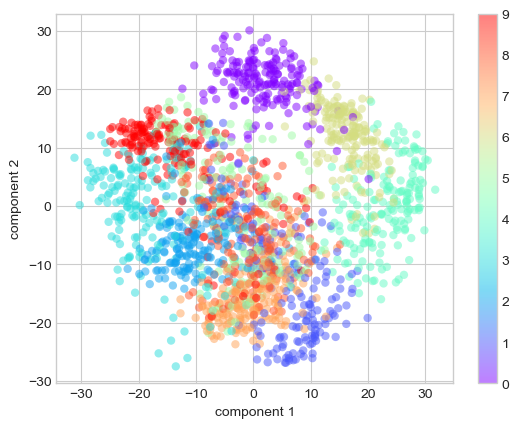

In [16]:
import matplotlib as mpl
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=mpl.colormaps['rainbow'])

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### A.3. Components

* PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.

* The principal components, which act as the low dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.

In [17]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest', cmap='binary')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

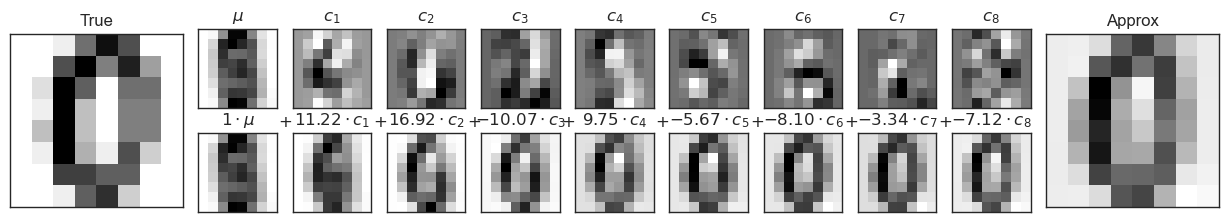

In [18]:
import seaborn as sns

pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

### A.3. Choosing the Number of Components:

* To estimate how many components are needed to describe the data, determine the cumulative explained variance ratio as a function of the number of components.
    * Looking at this can help understand the level of the redundancy present in its features.

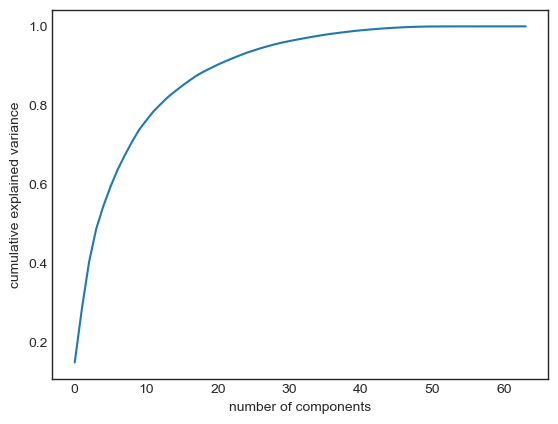

In [19]:
pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# B. PCA as Noise Filtering:

* Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.

* Rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional principal component representation, which will automatically serve to filter out random noise in the inputs.

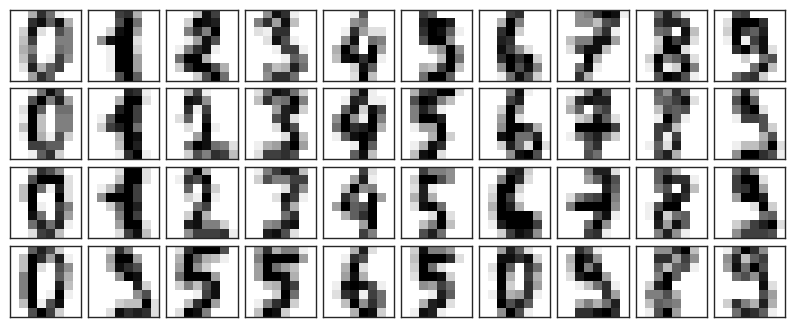

In [20]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        
plot_digits(digits.data)

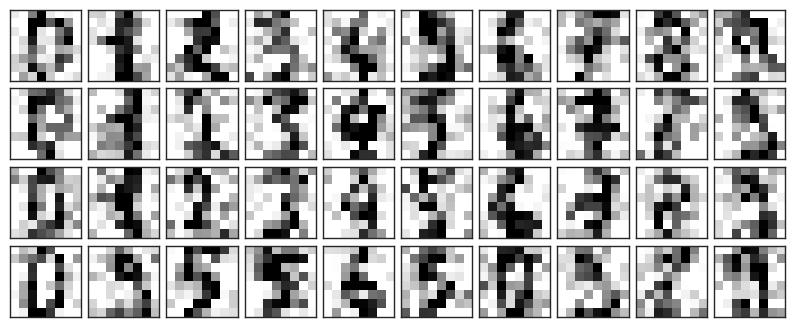

In [21]:
# Add some random noise

rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

In [22]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

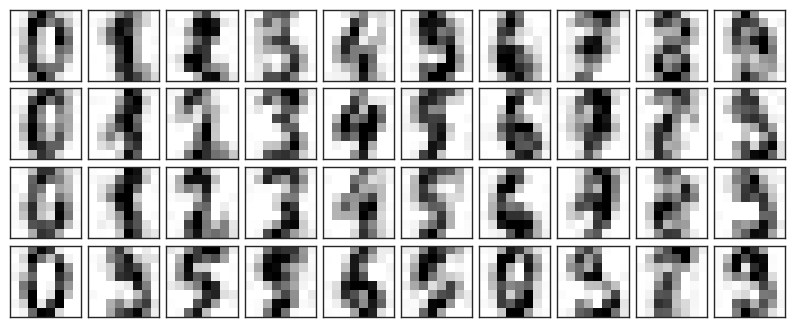

In [23]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)